# Team 6 - World Cup

![](https://img.fifa.com/image/upload/t_l4/v1543921822/ex1ksdevyxwsgu7rzdv6.jpg)

_For more information about the dataset, read [here](https://www.kaggle.com/abecklas/fifa-world-cup)._

## Your tasks
- Name your team!
- Read the source and do some quick research to understand more about the dataset and its topic
- Clean the data
- Perform Exploratory Data Analysis on the dataset
- Analyze the data more deeply and extract insights
- Visualize your analysis on Google Data Studio
- Present your works in front of the class and guests next Monday

## Submission Guide
- Create a Github repository for your project
- Upload the dataset (.csv file) and the Jupyter Notebook to your Github repository. In the Jupyter Notebook, **include the link to your Google Data Studio report**.
- Submit your works through this [Google Form](https://forms.gle/oxtXpGfS8JapVj3V8).

## Tips for Data Cleaning, Manipulation & Visualization
- Here are some of our tips for Data Cleaning, Manipulation & Visualization. [Click here](https://hackmd.io/cBNV7E6TT2WMliQC-GTw1A)

_____________________________

## Some Hints for This Dataset:
- Is there a way to integrate the data from all 3 datasets?
- It seems like the `winners` dataset doesn't have data of World Cup 2018. Can you Google the relevant information and add it to the dataset using `pandas`?
- The format of some number columns in `matches` dataset doesn't look right.
- Can you seperate the Date and the Time of `Datetime` column in `matches` dataset?
- And more...

In [ ]:
# Start your codes here!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


url_matches = ('https://raw.githubusercontent.com/GumbalWaterson/' +
               'World_Cups_Visualization/master/matches.csv')
url_players = ('https://raw.githubusercontent.com/GumbalWaterson/' +
               'World_Cups_Visualization/master/players.csv')
url_winners = ('https://raw.githubusercontent.com/GumbalWaterson/' +
                'World_Cups_Visualization/master/winners.csv')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**DATA CLEANING**

In [ ]:
matches = pd.read_csv(url_matches).dropna()
players = pd.read_csv(url_players).dropna()
winners = pd.read_csv(url_winners).dropna()
matches = matches.replace('Germany FR', 'Germany')
players = players.replace('Germany FR', 'Germany')
winners = winners.replace('Germany FR', 'Germany')

In [ ]:
matches.tail()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
847,2014.0,05 Jul 2014 - 17:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0.0,0.0,Costa Rica,Netherlands win on penalties (4 - 3),51179.0,0.0,0.0,Ravshan IRMATOV (UZB),RASULOV Abduxamidullo (UZB),KOCHKAROV Bakhadyr (KGZ),255953.0,300186488.0,NED,CRC
848,2014.0,08 Jul 2014 - 17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1.0,7.0,Germany,,58141.0,0.0,5.0,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955.0,300186474.0,BRA,GER
849,2014.0,09 Jul 2014 - 17:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0.0,0.0,Argentina,Argentina win on penalties (2 - 4),63267.0,0.0,0.0,C�neyt �AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),255955.0,300186490.0,NED,ARG
850,2014.0,12 Jul 2014 - 17:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0.0,3.0,Netherlands,,68034.0,0.0,2.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255957.0,300186502.0,BRA,NED
851,2014.0,13 Jul 2014 - 16:00,Final,Estadio do Maracana,Rio De Janeiro,Germany,1.0,0.0,Argentina,Germany win after extra time,74738.0,0.0,0.0,Nicola RIZZOLI (ITA),Renato FAVERANI (ITA),Andrea STEFANI (ITA),255959.0,300186501.0,GER,ARG


In [ ]:
players.tail()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
37658,255955,300186490,NED,Louis VAN GAAL (NED),S,9,V. PERSIE,C,O96'
37693,255957,300186502,NED,Louis VAN GAAL (NED),S,1,CILLESSEN,GK,O90'
37694,255957,300186502,BRA,SCOLARI Luiz Felipe (BRA),S,3,T SILVA,C,Y2'
37705,255957,300186502,NED,Louis VAN GAAL (NED),S,9,V. PERSIE,C,P3'
37715,255957,300186502,NED,Louis VAN GAAL (NED),N,22,VORM,GK,I90'


In [ ]:
winners.tail()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
15,1998,France,France,Brazil,Croatia,Netherlands,171,32,64,2.785.100
16,2002,Korea/Japan,Brazil,Germany,Turkey,Korea Republic,161,32,64,2.705.197
17,2006,Germany,Italy,France,Germany,Portugal,147,32,64,3.359.439
18,2010,South Africa,Spain,Netherlands,Germany,Uruguay,145,32,64,3.178.856
19,2014,Brazil,Germany,Argentina,Netherlands,Brazil,171,32,64,3.386.810


In [ ]:
matches["Home Team Name"].value_counts()

Brazil                     82
Germany                    75
Italy                      57
Argentina                  54
England                    35
                           ..
Ukraine                     1
Haiti                       1
New Zealand                 1
rn">Trinidad and Tobago     1
China PR                    1
Name: Home Team Name, Length: 77, dtype: int64

In [ ]:
names = matches[matches['Home Team Name'].
        str.contains('rn">')]['Home Team Name'].value_counts()
wrong = list(names.index)
correct = [name.split('>')[1] for name in wrong]
old_name = ['Germany FR', 'Maracan� - Est�dio Jornalista M�rio Filho',
            'Estadio do Maracana']
new_name = ['Germany', 'Maracan Stadium', 'Maracan Stadium']
wrong = wrong + old_name
correct = correct + new_name
for index, wr in enumerate(wrong):
    winners = winners.replace(wrong[index], correct[index])
    
for index, wr in enumerate(wrong):
    matches = matches.replace(wrong[index], correct[index])
    
for index, wr in enumerate(wrong):
    players = players.replace(wrong[index], correct[index])

In [ ]:
matches["Home Team Name"].value_counts()

Brazil       82
Germany      75
Italy        57
Argentina    54
England      35
             ..
Norway        1
Iran          1
Serbia        1
Ukraine       1
Haiti         1
Name: Home Team Name, Length: 77, dtype: int64

In [ ]:
winners['Attendance'] = winners['Attendance'].str.replace('.', '').astype(
                                                                   'int64')

Number of winning titles

In [ ]:
champ = winners["Winner"]
runnerup = winners["Runners-Up"]
third = winners["Third"]

Text(0.5, 1.0, 'Number of title by country')

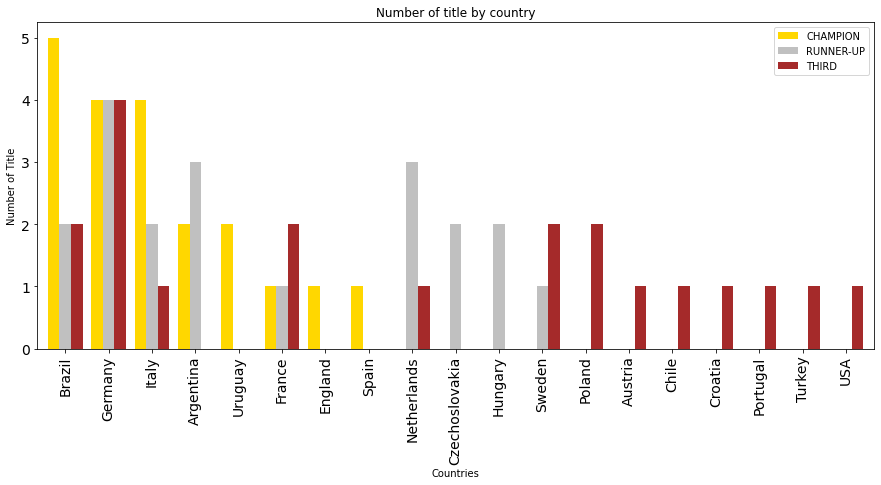

In [ ]:

champ_count = pd.DataFrame.from_dict(champ.value_counts())
runnerup_count = pd.DataFrame.from_dict(runnerup.value_counts())
third_count = pd.DataFrame.from_dict(third.value_counts())
title_count = champ_count.join(runnerup_count, how='outer').join(third_count, how='outer')
title_count = title_count.fillna(0)
title_count.columns = ['CHAMPION', 'RUNNER-UP', 'THIRD']
title_count = title_count.astype('int64')
title_count = title_count.sort_values(by=['CHAMPION', 'RUNNER-UP', 'THIRD'], ascending=False)

title_count.plot(y=['CHAMPION', 'RUNNER-UP', 'THIRD'], kind="bar", 
                  color =['gold','silver','brown'], figsize=(15, 6), fontsize=14,
                 width=0.8, align='center')
plt.xlabel('Countries')
plt.ylabel('Number of Title')
plt.title('Number of title by country')

Attendace Per Year

Text(0.5, 1.0, 'Attendance Per Year')

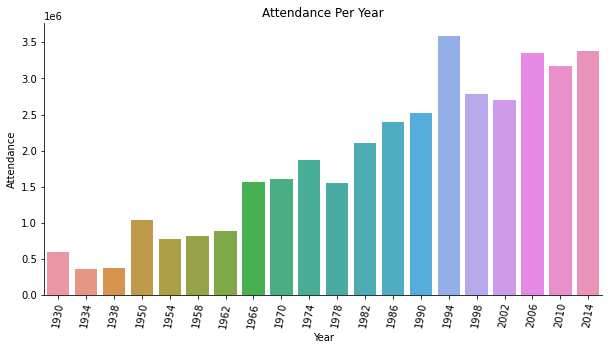

In [ ]:
fig, ax = plt.subplots(figsize = (10,5))
sns.despine(right = True)
g = sns.barplot(x = 'Year', y = 'Attendance', data = winners)
g.set_xticklabels(g.get_xticklabels(), rotation = 80)
g.set_title('Attendance Per Year')

Matches with the highest number of Attendence

In [ ]:
matches['Datetime'] = pd.to_datetime(matches['Datetime'])
matches['Datetime'] = matches['Datetime'].apply(
                                          lambda x: x.strftime('%d %b, %y'))

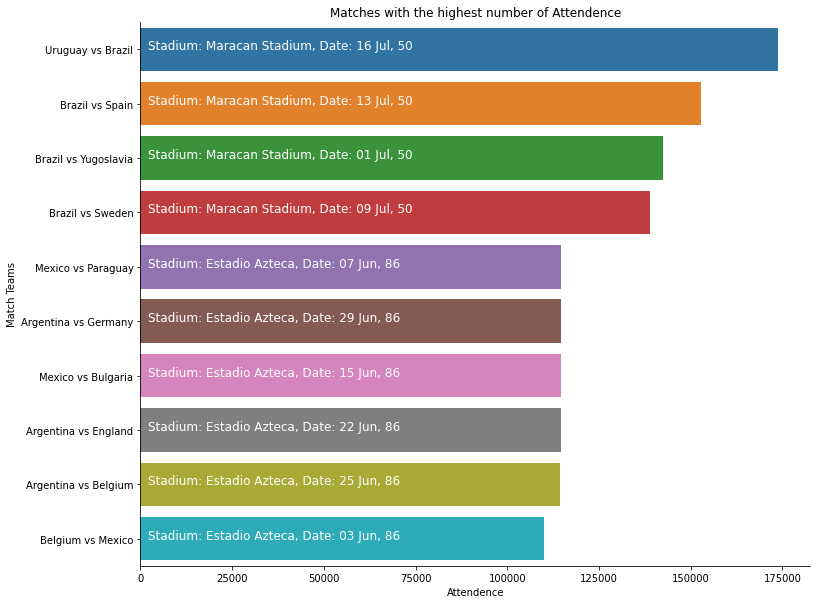

In [ ]:
top10 = matches.sort_values(by = 'Attendance', ascending = False)[:10]
top10['vs'] = top10['Home Team Name'] + " vs " + top10['Away Team Name']

plt.figure(figsize = (12,10))

ax = sns.barplot(y = top10['vs'], x = top10['Attendance'])
sns.despine(right = True)

plt.ylabel('Match Teams')
plt.xlabel('Attendence')
plt.title('Matches with the highest number of Attendence')

for i, s in enumerate("Stadium: " + top10['Stadium'] +", Date: " +
                      top10['Datetime']):
    ax.text(2000, i, s, fontsize = 12, color = 'white')
plt.show()


Stadium with the heighest number of attendance

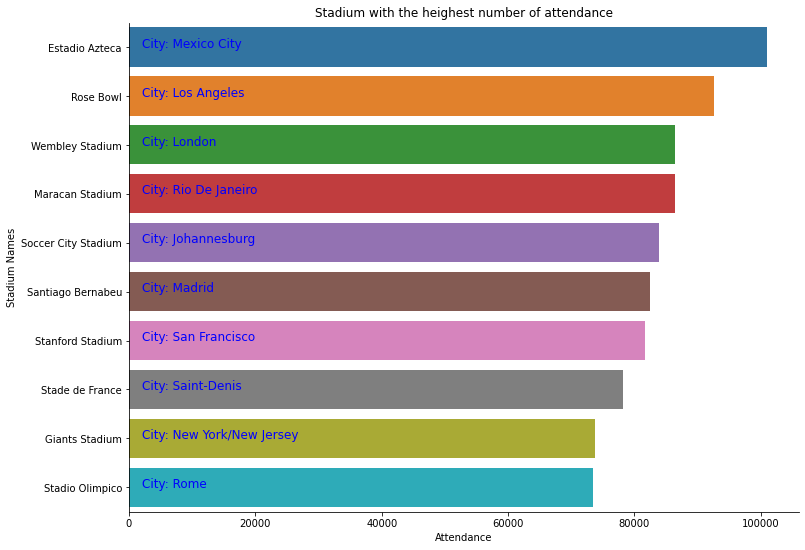

In [ ]:
matches['Year'] = matches['Year'].astype(int)

std = matches.groupby(['Stadium',
                      'City'])['Attendance'].mean().reset_index().sort_values(by = 'Attendance',
                                                                              ascending =False)

top10 = std[:10]

plt.figure(figsize = (12,9))
ax = sns.barplot(y = top10['Stadium'], x = top10['Attendance'])
sns.despine(right = True)

plt.ylabel('Stadium Names')
plt.xlabel('Attendance')
plt.title('Stadium with the heighest number of attendance')
for i, s in enumerate("City: " + top10['City']):
        ax.text(2000, i, s, fontsize = 12, color = 'b')
        
plt.show()